In [28]:
# Importação de bibliotecas 📌

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Leitura dos arquivos CSV 📌

df_avaliacoes = pd.read_csv("avaliacoes_pedidos.csv")
df_categorias = pd.read_csv("categorias_produtos.csv")
df_clientes = pd.read_csv("clientes.csv")
df_geolocalizacao = pd.read_csv("geolocalizacao.csv")
df_itens = pd.read_csv("itens_pedidos.csv")
df_pedidos = pd.read_csv("pedidos.csv")
df_pagamentos = pd.read_csv("pedidos_pagamentos.csv")
df_produtos = pd.read_csv("produtos.csv")
df_vendedores = pd.read_csv("vendedores.csv")

In [6]:
# Criação do banco SQLite e armazenamento das tabelas 📌

conn = sqlite3.connect("etapa.db")

# Salvando todas as tabelas no banco
df_avaliacoes.to_sql("avaliacoes_pedidos", conn, if_exists="replace", index=False)
df_categorias.to_sql("categorias_produtos", conn, if_exists="replace", index=False)
df_clientes.to_sql("clientes", conn, if_exists="replace", index=False)
df_geolocalizacao.to_sql("geolocalizacao", conn, if_exists="replace", index=False)
df_itens.to_sql("itens_pedidos", conn, if_exists="replace", index=False)
df_pedidos.to_sql("pedidos", conn, if_exists="replace", index=False)
df_pagamentos.to_sql("pedidos_pagamentos", conn, if_exists="replace", index=False)
df_produtos.to_sql("produtos", conn, if_exists="replace", index=False)
df_vendedores.to_sql("vendedores", conn, if_exists="replace", index=False)


3095

In [7]:
# Verificando as tabelas existentes no banco SQLite
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabelas = cursor.fetchall()

# Exibe os nomes das tabelas
for nome in tabelas:
    print(nome[0])

avaliacoes_pedidos
categorias_produtos
clientes
geolocalizacao
itens_pedidos
pedidos
pedidos_pagamentos
produtos
vendedores


In [10]:
for df, nome in [
    (df_pedidos, "Pedidos"),
    (df_pagamentos, "Pagamentos"),
    (df_avaliacoes, "Avaliações"),
    (df_itens, "Itens dos Pedidos"),
    (df_produtos, "Produtos"),
    (df_clientes, "Clientes"),
    (df_vendedores, "Vendedores"),
    (df_geolocalizacao, "Geolocalização"),
    (df_categorias, "Categorias de Produtos")
]:
    print(f"\n📌 Tipos de dados da tabela: {nome}")
    print(df.dtypes)


📌 Tipos de dados da tabela: Pedidos
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

📌 Tipos de dados da tabela: Pagamentos
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

📌 Tipos de dados da tabela: Avaliações
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

📌 Tipos de dados da tabela: Itens dos Pedidos
order_id                object
order_item_id            int64
product_id    

In [11]:
# 🧾 Tabela: pedidos
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'], errors='coerce')
df_pedidos['order_approved_at'] = pd.to_datetime(df_pedidos['order_approved_at'], errors='coerce')
df_pedidos['order_delivered_carrier_date'] = pd.to_datetime(df_pedidos['order_delivered_carrier_date'], errors='coerce')
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'], errors='coerce')
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'], errors='coerce')

# 🧾 Tabela: avaliacoes_pedidos
df_avaliacoes['review_creation_date'] = pd.to_datetime(df_avaliacoes['review_creation_date'], errors='coerce')
df_avaliacoes['review_answer_timestamp'] = pd.to_datetime(df_avaliacoes['review_answer_timestamp'], errors='coerce')

# 🧾 Tabela: itens_pedidos
df_itens['shipping_limit_date'] = pd.to_datetime(df_itens['shipping_limit_date'], errors='coerce')


In [41]:
query_vendas_estado = """
SELECT
    c.customer_state AS estado,
    ROUND(SUM(pag.payment_value), 2) AS total_vendas,
    'R$ ' || REPLACE(printf('%.2f', SUM(pag.payment_value)), '.', ',') AS total_vendas_formatado
FROM pedidos ped
INNER JOIN pedidos_pagamentos pag ON
    ped.order_id = pag.order_id
INNER JOIN clientes c ON
    ped.customer_id = c.customer_id
GROUP BY
    c.customer_state
ORDER BY
    total_vendas DESC
"""

vendas_estado = pd.read_sql_query(query_vendas_estado, conn)
vendas_estado


,estado,total_vendas,total_vendas_formatado
0,SP,5998226.96,"R$ 5998226,96"
1,RJ,2144379.69,"R$ 2144379,69"
2,MG,1872257.26,"R$ 1872257,26"
3,RS,890898.54,"R$ 890898,54"
4,PR,811156.38,"R$ 811156,38"
5,SC,623086.43,"R$ 623086,43"
6,BA,616645.82,"R$ 616645,82"
7,DF,355141.08,"R$ 355141,08"
8,GO,350092.31,"R$ 350092,31"
9,ES,325967.55,"R$ 325967,55"


/tmp/ipython-input-38-3724126573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


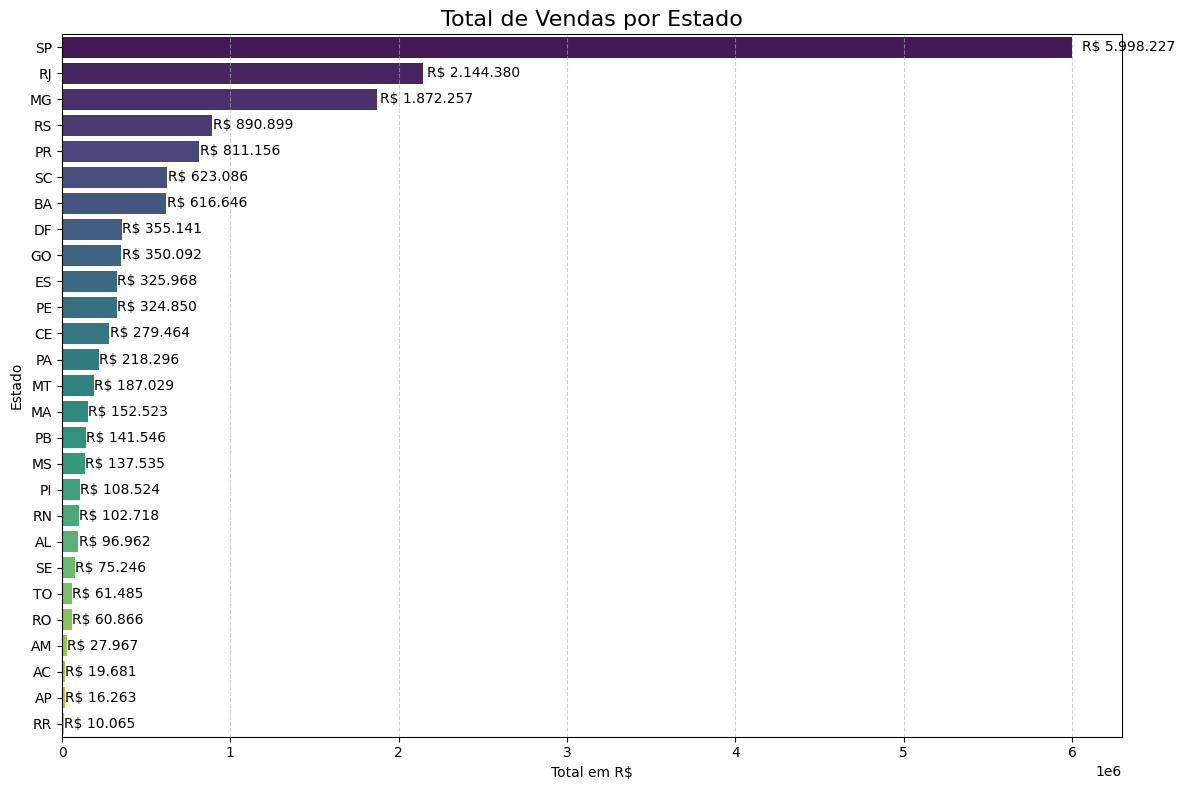

In [38]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=vendas_estado,
    x="total_vendas",
    y="estado",
    palette="viridis"
)

plt.title("Total de Vendas por Estado", fontsize=16)
plt.xlabel("Total em R$")
plt.ylabel("Estado")
plt.grid(axis='x', linestyle="--", alpha=0.6)

for i, (valor, estado) in enumerate(zip(vendas_estado['total_vendas'], vendas_estado['estado'])):
    if pd.notna(valor):
        texto_formatado = f"R$ {valor:,.0f}".replace(",", "v").replace(".", ",").replace("v", ".")
        ax.text(valor + (valor * 0.01), i, texto_formatado, va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


In [20]:
query_tempo_entrega = """
SELECT
    ROUND(AVG(
        JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp)
    ), 2) AS tempo_medio_entrega
FROM pedidos
WHERE order_delivered_customer_date IS NOT NULL
  AND order_purchase_timestamp IS NOT NULL
"""
tempo_entrega = pd.read_sql_query(query_tempo_entrega, conn)

# Formatando o valor com o sufixo " dias"
tempo_entrega['tempo_medio_entrega'] = tempo_entrega['tempo_medio_entrega'].apply(
    lambda x: f"{x:.2f} dias"
)

tempo_entrega


,tempo_medio_entrega
0,12.56 dias


In [53]:
import plotly.graph_objects as go

# Extrai e converte o valor numérico
tempo = float(
    tempo_entrega['tempo_medio_entrega'].iloc[0]
        .replace(' dias', '')
        .replace(',', '.')
        .strip()
)

# Gráfico tipo velocímetro com agulha
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=tempo,
    title={'text': "Tempo Médio de Entrega (dias)"},
    gauge={
        'axis': {'range': [0, 30]},
        'bar': {'color': "black", 'thickness': 0.2},  # Agulha fina preta
        'steps': [
            {'range': [0, 10], 'color': 'green'},
            {'range': [10, 20], 'color': 'yellow'},
            {'range': [20, 30], 'color': 'red'}
        ]
    }
))

fig.show()


In [22]:
query_vendas_mes = """
SELECT
    STRFTIME('%Y-%m', order_purchase_timestamp) AS mes,
    COUNT(*) AS total_pedidos
FROM pedidos
WHERE order_purchase_timestamp IS NOT NULL
GROUP BY mes
ORDER BY total_pedidos DESC
"""
vendas_mes = pd.read_sql_query(query_vendas_mes, conn)
vendas_mes


,mes,total_pedidos
0,2017-11,7544
1,2018-01,7269
2,2018-03,7211
3,2018-04,6939
4,2018-05,6873
5,2018-02,6728
6,2018-08,6512
7,2018-07,6292
8,2018-06,6167
9,2017-12,5673


In [55]:
fig = px.line(
    vendas_mes.sort_values("mes"),
    x="mes",
    y="total_pedidos",
    title="📈 Volume de Pedidos por Mês",
    markers=True,
    labels={"mes": "Mês", "total_pedidos": "Total de Pedidos"}
)
fig.update_traces(line=dict(width=3))
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [25]:
query_categoria_dispersao = """
SELECT
    prod.product_category_name AS categoria,
    COUNT(*) AS quantidade_itens,
    ROUND(SUM(itens.price), 2) AS valor_total
FROM itens_pedidos itens
INNER JOIN produtos prod ON
    itens.product_id = prod.product_id
GROUP BY
    prod.product_category_name
HAVING quantidade_itens > 0 AND valor_total > 0
ORDER BY
    valor_total DESC
"""
categorias_dispersao = pd.read_sql_query(query_categoria_dispersao, conn)
categorias_dispersao

categorias_dispersao['valor_total'] = categorias_dispersao['valor_total'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
)

categorias_dispersao


,categoria,quantidade_itens,valor_total
0,beleza_saude,9670,"R$ 1.258.681,34"
1,relogios_presentes,5991,"R$ 1.205.005,68"
2,cama_mesa_banho,11115,"R$ 1.036.988,68"
3,esporte_lazer,8641,"R$ 988.048,97"
4,informatica_acessorios,7827,"R$ 911.954,32"
...,...,...,...
69,flores,33,"R$ 1.110,04"
70,casa_conforto_2,30,"R$ 760,27"
71,cds_dvds_musicais,14,"R$ 730,00"
72,fashion_roupa_infanto_juvenil,8,"R$ 569,85"


In [82]:
# Ajusta os nomes das categorias para remover underscores e deixar com espaço
df_disp_top["Categoria"] = df_disp_top["product_category_name"].str.replace("_", " ").str.title()

# Gera o gráfico com o nome ajustado
fig = px.scatter(
    df_disp_top,
    x="quantidade_vendas",
    y="valor_total",
    size="valor_total",
    color="Categoria",  # novo nome da coluna com label mais amigável
    text="Categoria",
    title="📍 Dispersão de Vendas: Top 10 Categorias com Maior Faturamento",
    labels={
        "quantidade_vendas": "Quantidade Vendida",
        "valor_total": "Valor Total (R$)",
        "Categoria": "Categoria"
    }
)

# Estiliza o texto (rótulos) no gráfico
fig.update_traces(
    textposition="top center",
    textfont=dict(color="black", size=12)
)

fig.show()
